In [140]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ppl = pd.read_csv('Traffic_Crashes_-_People.csv')
df_cars = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
df_crashes = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_crashes.columns = df_crashes.columns.str.strip().str.lower()
df_cars.columns = df_cars.columns.str.strip().str.lower()
df_ppl.columns = df_ppl.columns.str.strip().str.lower()

In [6]:
df_ppl.columns

Index(['person_id', 'person_type', 'crash_record_id', 'rd_no', 'vehicle_id',
       'crash_date', 'seat_no', 'city', 'state', 'zipcode', 'sex', 'age',
       'drivers_license_state', 'drivers_license_class', 'safety_equipment',
       'airbag_deployed', 'ejection', 'injury_classification', 'hospital',
       'ems_agency', 'ems_run_no', 'driver_action', 'driver_vision',
       'physical_condition', 'pedpedal_action', 'pedpedal_visibility',
       'pedpedal_location', 'bac_result', 'bac_result value',
       'cell_phone_use'],
      dtype='object')

# Merge 

In [4]:
df_crashes[['street_direction', 'street_name']] = df_crashes[['street_direction', 'street_name']].astype(str)
df_crashes['street']= df_crashes['street_direction'] + ' ' + df_crashes['street_name']

df_crashes['crash_year'] = pd.DatetimeIndex(df_crashes['crash_date']).year

newdf = df_ppl[(df_ppl.person_type == "DRIVER")]

m1 = pd.merge(df_cars, newdf, how='left', on=['crash_record_id'])


m2 = pd.merge(m1, df_crashes, how='left', on=['crash_record_id'])


df = m2.drop_duplicates(subset=['crash_record_id'], keep='first')
df


,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,street,crash_year
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),S CALIFORNIA BLVD,2020
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,Na

In [165]:
df['safety_equipment'].value_counts()

USAGE UNKNOWN                          326585
SAFETY BELT USED                       200678
NONE PRESENT                             8346
SAFETY BELT NOT USED                     2244
HELMET NOT USED                           656
DOT COMPLIANT MOTORCYCLE HELMET           302
HELMET USED                               229
NOT DOT COMPLIANT MOTORCYCLE HELMET        79
SHOULD/LAP BELT USED IMPROPERLY            53
WHEELCHAIR                                  2
CHILD RESTRAINT USED                        1
Name: safety_equipment, dtype: int64

In [9]:
df['injuries_total'].value_counts()

0.0     469005
1.0      53666
2.0      11713
3.0       3567
4.0       1289
5.0        471
6.0        183
7.0         69
8.0         24
9.0         16
10.0         9
15.0         5
11.0         5
13.0         2
21.0         2
12.0         2
19.0         1
16.0         1
Name: injuries_total, dtype: int64

In [5]:
df['injury'] = df['injuries_total'] >= 1

<ipython-input-5-b25d72c5b5db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['injury'] = df['injuries_total'] >= 1


In [6]:
df['injury'] = df['injury'].astype(int)

<ipython-input-6-97a2096c4016>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['injury'] = df['injury'].astype(int)


In [13]:
df_injury = df[df['injuries_total'] >= 1]

In [14]:
df_injury['street_name'].value_counts()

WESTERN AVE      1993
PULASKI RD       1908
HALSTED ST       1760
ASHLAND AVE      1736
CICERO AVE       1701
                 ... 
MC ALPIN AVE        1
WENTWORTH ST        1
RIVERDALE AVE       1
NINA AVE            1
124TH ST            1
Name: street_name, Length: 1140, dtype: int64

In [49]:
df_severe = df_ppl[(df_ppl['injury_classification'] == 'INCAPACITATING INJURY') | (df_ppl['injury_classification'] == "FATAL")]

In [ ]:
df_severe_

In [59]:
df_ppl['driver_action'].value_counts()

NONE                                 344715
UNKNOWN                              227765
FAILED TO YIELD                       87804
OTHER                                 81985
FOLLOWED TOO CLOSELY                  60871
IMPROPER BACKING                      30203
IMPROPER TURN                         25163
IMPROPER LANE CHANGE                  25019
IMPROPER PASSING                      21036
DISREGARDED CONTROL DEVICES           15881
TOO FAST FOR CONDITIONS               15406
IMPROPER PARKING                       3690
WRONG WAY/SIDE                         3650
CELL PHONE USE OTHER THAN TEXTING      1579
EVADING POLICE VEHICLE                 1569
OVERCORRECTED                          1144
EMERGENCY VEHICLE ON CALL               918
TEXTING                                 416
STOPPED SCHOOL BUS                      105
LICENSE RESTRICTIONS                     43
Name: driver_action, dtype: int64

In [57]:
df_severe['driver_action'].value_counts()

NONE                                 3619
UNKNOWN                              1940
OTHER                                1277
FAILED TO YIELD                       526
DISREGARDED CONTROL DEVICES           337
TOO FAST FOR CONDITIONS               306
FOLLOWED TOO CLOSELY                  129
IMPROPER TURN                         108
WRONG WAY/SIDE                        107
IMPROPER LANE CHANGE                   89
IMPROPER PASSING                       55
EVADING POLICE VEHICLE                 28
IMPROPER BACKING                       19
EMERGENCY VEHICLE ON CALL              18
CELL PHONE USE OTHER THAN TEXTING      14
OVERCORRECTED                          11
TEXTING                                 6
IMPROPER PARKING                        2
Name: driver_action, dtype: int64

In [52]:
df_fatal = df_crashes[df_crashes['injuries_fatal'] >= 1]

In [84]:
df_fatal

,crash_record_id,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
31,09eba71804d41a145cbf5423f5a6a99fe8e8e08d4f4757...,JD292201,NaN,07/10/2020 02:55:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,FOUR WAY,NaN,STRAIGHT AND LEVEL,WET,UNKNOWN,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,Y,"OVER $1,500",07/10/2020 02:55:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,501,S,SACRAMENTO BLVD,1135.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2,6,7,NaN,NaN,NaN
674,fdc5d4d1299102e75fd8c7997ea5c343a0b5e62a4f7bde...,JD168667,Y,02/29/2020 12:35:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"$501 - $1,500",02/29/2020 12:39:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,3730,W,LAKE ST,1122.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,7,2,41.885242,-87.719702,POINT (-87.719701637005 41.885242209045)
1229,0b5c9ae3e936fd93a9c9dab85e638c0cb848a586a18551...,JD293557,NaN,07/11/2020 06:41:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,HEAD ON,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",07/11/2020 06:53:00 AM,IMPROPER LANE USAGE,UNABLE TO DETERMINE,2558,W,PETERSON AVE,2413.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,FATAL,4.0,1.0,1.0,2.0,0.0,0.0,0.0,6,7,7,41.990581,-87.694474,POINT (-87.694474132951 41.990580936971)
2816,f4e1f0e49f5235e4d309257a1e506aed15ea89c1df66ca...,JC435500,NaN,09/16/2019 11:11:00 AM,45,UNKNOWN,FUNCTIONING PROPERLY,CLOUDY/OVERCAST,DAYLIGHT,FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,NaN,"CURVE, LEVEL",DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,NaN,"OVER $1,500",09/16/2019 11:11:00 AM,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,UNABLE TO DETERMINE,8600,S,CHICAGO SKYWAY OB,412.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,FATAL,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11,2,9,NaN,NaN,NaN
3263,4f74423f38a9e168e7034e444a9145b813f4bc06ec8b81...,JA493953,Y,11/01/2017 02:15:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,DIVIDED - W/MEDIAN BARRIER,3.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",11/01/2017 02:25:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,8300,S,STONY ISLAND AVE,412.0,Y,NaN,NaN,NaN,NaN,NaN,2.0,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2,4,11,41.744152,-87.585945,POINT (-87.585945066953 41.744151639042)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535434,fd348eebbdb21cb171cc2a1a6c9c216568312dccab64a8...,JD450895,NaN,12/05/2020 11:48:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",12/05/2020 11:58:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,7401,S,CICERO AVE,833.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,FATAL,1.0,1.0,0.0,0.0,0.0,0.0,0.0,23,7,12,41.758728,-87.741536,POINT (-87.741535662317 41.75872799769)
535637,fd4e962185d0aa49510488709abd0c39b40cf664c1b81a...,JC487730,NaN,10/26/2019 10:

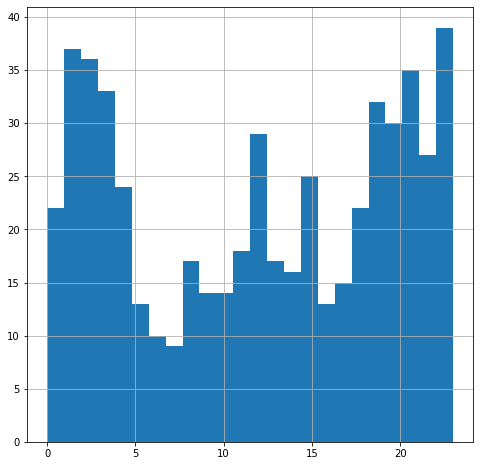

In [89]:
df_fatal['crash_hour'].hist(bins = 24, figsize = (8, 8));

In [275]:
df_fatal['crash_day_of_week'].value_counts()

1    99
7    90
4    84
5    82
6    72
2    66
3    54
Name: crash_day_of_week, dtype: int64

In [116]:
df['road_defect'].value_counts()

NO DEFECTS           448327
UNKNOWN               81207
RUT, HOLES             4718
OTHER                  3045
WORN SURFACE           2222
SHOULDER DEFECT        1156
DEBRIS ON ROADWAY       458
Name: road_defect, dtype: int64

In [20]:
df['fatality'] = df['injuries_fatal'] >= 1

<ipython-input-20-2e28458a73c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatality'] = df['injuries_fatal'] >= 1


In [22]:
df['fatality'] = df['fatality'].astype(int)

<ipython-input-22-f7c6d7927227>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatality'] = df['fatality'].astype(int)


In [23]:
df['fatality'].sum()

547

In [7]:
df['prim_contributory_cause'].value_counts()

UNABLE TO DETERMINE                                                                 202535
FAILING TO YIELD RIGHT-OF-WAY                                                        59071
FOLLOWING TOO CLOSELY                                                                56183
NOT APPLICABLE                                                                       29030
IMPROPER OVERTAKING/PASSING                                                          25754
FAILING TO REDUCE SPEED TO AVOID CRASH                                               23418
IMPROPER BACKING                                                                     23249
IMPROPER LANE USAGE                                                                  20576
IMPROPER TURNING/NO SIGNAL                                                           17895
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  17175
DISREGARDING TRAFFIC SIGNALS                                                         10095

In [ ]:
cause_dict = {}

In [105]:
X = df[['crash_hour', 'crash_day_of_week']]
y = df['fatalty']

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [116]:
columns = ['crash_record_id', 'crash_date_x', 'latitude', 'longitude', 'injury', 'crash_month', 'crash_hour',
           'street_name', 'damage', 'hit_and_run_i', 'roadway_surface_cond', 'road_defect',
          'weather_condition', 'crash_day_of_week', 'driver_action', 'exceed_speed_limit_i',
          'prim_contributory_cause', 'first_crash_type']


In [117]:
df_imp = df[columns]

In [118]:
df1 = df_imp

# Train/Test Split

In [19]:
X = df1.drop([ 'injury'], axis=1)
y = df1['injury']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [199]:
len(df_imp)

541133

In [119]:
df_injuries = df1.loc[df_imp['injury'] == 1]

In [175]:
df_yield = df_injuries.loc[df_injuries['prim_contributory_cause'] == 'FAILING TO YIELD RIGHT-OF-WAY']

In [161]:
df_yield['street_name'].value_counts().head(15)

PULASKI RD        342
ASHLAND AVE       333
WESTERN AVE       333
HALSTED ST        322
CICERO AVE        280
KEDZIE AVE        222
MILWAUKEE AVE     204
DAMEN AVE         174
MICHIGAN AVE      169
STATE ST          167
CLARK ST          165
CHICAGO AVE       164
ARCHER AVE        152
CALIFORNIA AVE    149
GRAND AVE         144
Name: street_name, dtype: int64

In [164]:
df['street_name'].value_counts().head(15)

WESTERN AVE         14808
PULASKI RD          12850
CICERO AVE          11841
ASHLAND AVE         11747
HALSTED ST          10475
KEDZIE AVE           9130
MICHIGAN AVE         7064
STATE ST             6415
NORTH AVE            6266
CLARK ST             5977
STONY ISLAND AVE     5582
CALIFORNIA AVE       5549
GRAND AVE            5475
CENTRAL AVE          5373
IRVING PARK RD       5334
Name: street_name, dtype: int64

In [120]:
df_injuries

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause,first_crash_type
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,15,DEVON AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS,ANGLE
13,55a20437d79a3176ac805c65b13940186970246ab14ce5...,02/07/2020 01:19:00 PM,41.748003,-87.566318,1,2,13,YATES BLVD,$500 OR LESS,NaN,WET,NO DEFECTS,CLEAR,6,FAILED TO YIELD,NaN,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,PEDESTRIAN
25,983284fd6cb4a9ca96b05543a77306302da59c4a6ff1b8...,02/09/2020 04:32:00 PM,41.879418,-87.636521,1,2,16,LOWER WACKER DR,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,1,FAILED TO YIELD,NaN,FAILING TO REDUCE SPEED TO AVOID CRASH,TURNING
58,034f42deaec11021e28cda25717373e36351025652ccf1...,09/09/2018 12:25:00 PM,41.737376,-87.643781,1,9,12,VINCENNES AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,1,UNKNOWN,NaN,UNABLE TO DETERMINE,TURNING
64,ed571d6d3be6511047bea9305a81182fd7b99afbb0abc6...,07/06/2020 03:57:00 PM,NaN,NaN,1,7,15,71ST ST,"OVER $1,500",NaN,DRY,UNKNOWN,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS,TURNING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960715,c7371836db500f7f5882d42bbbcdbee1b5287ca439a14b...,08/27/2021 08:30:00 PM,41.945133,-87.825511,1,8,20,FOREST PRESERVE AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,CLEAR,6,OTHER,NaN,UNABLE TO DETERMINE,REAR END
1960747,ee13238d1a794ac07e659473e76351547bbfc0dc72dc7c...,08/27/2021 11:12:00 AM,41.805617,-87.665036,1,8,11,ASHLAND AVE,"OVER $1,500",Y,DRY,DEBRIS ON ROADWAY,CLEAR,6,OTHER,NaN,"EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PEDESTRIAN
1960784,734d77c5854d1c1b4e0bcebeb3990b7592de64aa748ef7...,08/27/2021 06:00:00 PM,41.904066,-87.640191,1,8,18,CLYBOURN AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,FAILING TO REDUCE SPEED TO AVOID CRASH,REAR END
1960837,1389f1bd81101e9c99be7b1fd8638c5dcae50e128e3dbe...,08/27/2021 07:54:00 PM,41.880757,-87.624190,1,8,19,MICHIGAN AVE,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,6,IMPROPER PASSING,NaN,IMPROPER OVERTAKING/PASSING,SIDESWIPE SAME DIRECTION


In [101]:
dr_action = dr_action.drop(['LICENSE RESTRICTIONS', 'STOPPED SCHOOL BUS'])

In [106]:
dr_action

driver_action
CELL PHONE USE OTHER THAN TEXTING     1369
DISREGARDED CONTROL DEVICES          14106
EMERGENCY VEHICLE ON CALL              483
EVADING POLICE VEHICLE                1448
FAILED TO YIELD                      79282
FOLLOWED TOO CLOSELY                 56942
IMPROPER BACKING                     28908
IMPROPER LANE CHANGE                 23078
IMPROPER PARKING                      3542
IMPROPER PASSING                     19506
IMPROPER TURN                        23108
OVERCORRECTED                          997
TEXTING                                374
TOO FAST FOR CONDITIONS              14157
WRONG WAY/SIDE                        3175
Name: crash_record_id, dtype: int64

In [86]:
dr_action = df1.groupby(df1['driver_action']).count()['crash_record_id']

In [92]:
dr_action = dr_action.drop(['NONE', 'OTHER', 'UNKNOWN'])

<AxesSubplot:xlabel='driver_action'>

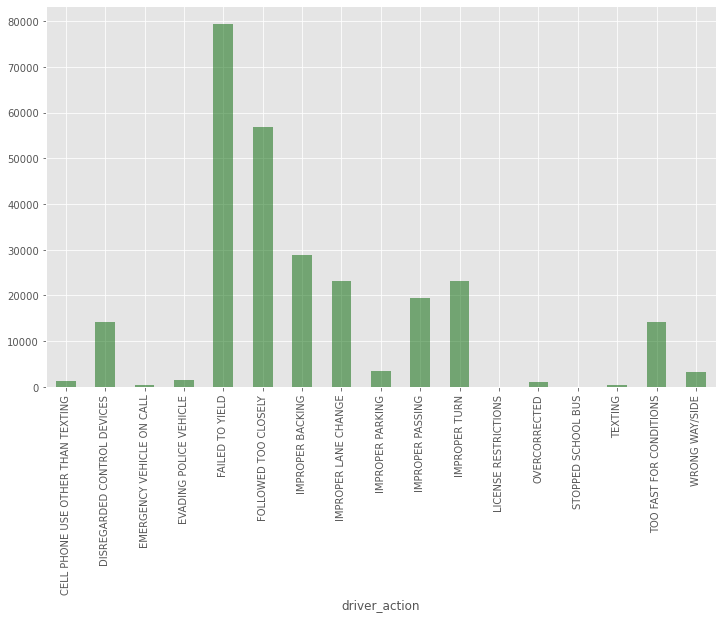

In [93]:
dr_action.plot(kind='bar', figsize=(12,7), color='darkgreen', alpha=.5)

In [69]:
injuries = df_injuries.groupby(df_injuries['driver_action']).count()['crash_record_id']

In [102]:
injuries = injuries.drop(['LICENSE RESTRICTIONS', 'STOPPED SCHOOL BUS'])

<AxesSubplot:xlabel='driver_action'>

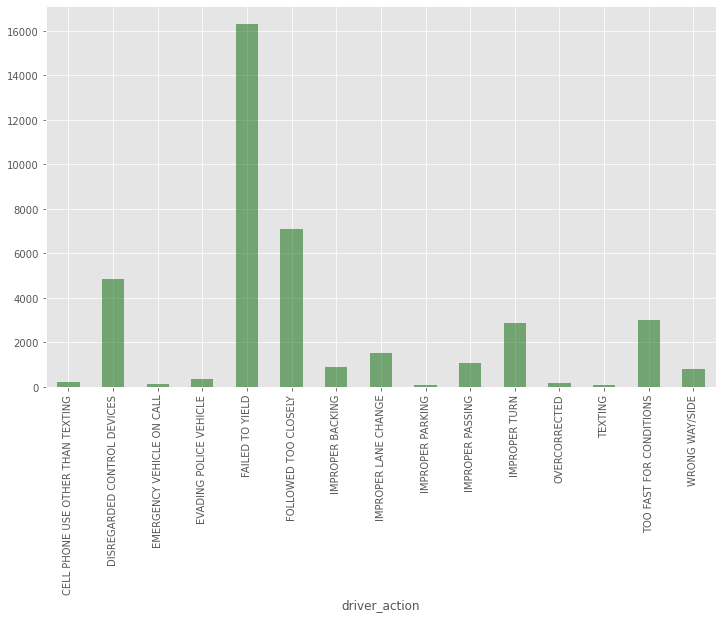

In [103]:
injuries.plot(kind='bar', figsize=(12,7), color='darkgreen', alpha=.5)

In [104]:
inj_prop = injuries / dr_action

In [154]:
inj_prop = inj_prop.sort_values(ascending=False)

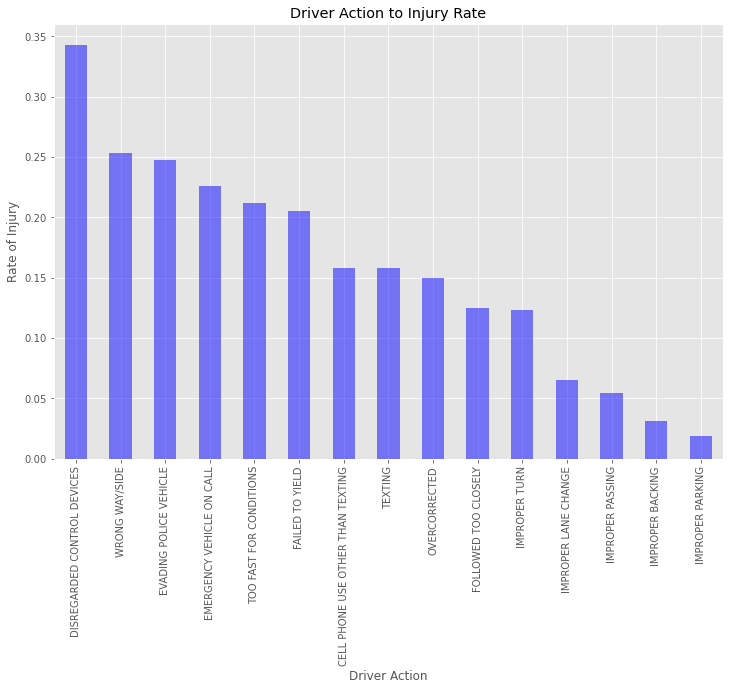

In [159]:
plt.style.use('ggplot')

inj_prop.plot(kind='bar', figsize=(12,8), color = 'blue', alpha=.5, sort_columns=True)

plt.title('Driver Action to Injury Rate')
plt.xlabel('Driver Action')
plt.ylabel('Rate of Injury');
plt.savefig('Action_v_Injury')

In [144]:
type(inj_prop)

pandas.core.series.Series

SyntaxError: invalid syntax (<ipython-input-145-a85479f53cec>, line 1)

In [114]:
crash_type = df.groupby(df['first_crash_type']).count()['crash_unit_id']

<AxesSubplot:xlabel='first_crash_type'>

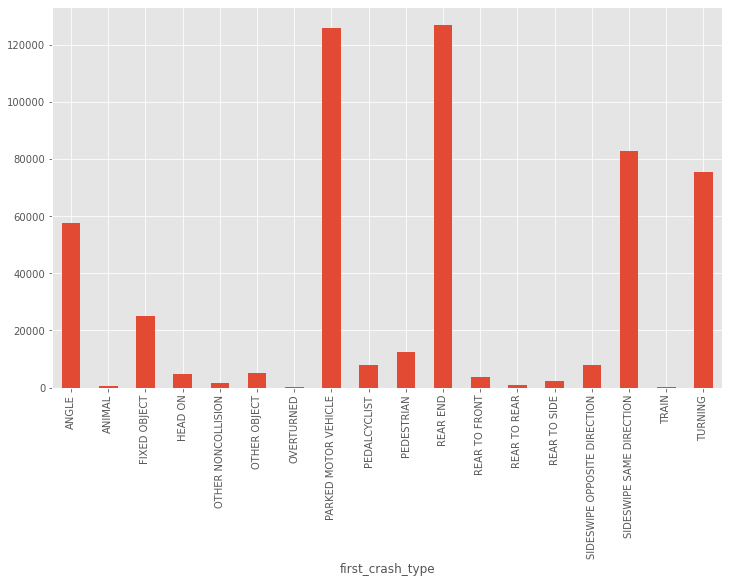

In [115]:
crash_type.plot(kind='bar', figsize =(12,7))

In [123]:
inj_crash_type = df_injuries.groupby(df_injuries['first_crash_type']).count()


In [126]:
inj_crash_type = inj_crash_type['crash_record_id']

In [134]:

crash_type2 = crash_type.drop(labels = ['ANIMAL', 'TRAIN', 'PEDALCYCLIST', 'PEDESTRIAN', 'OVERTURNED'])
inj_crash_type2 = inj_crash_type.drop(labels = ['ANIMAL', 'TRAIN', 'PEDALCYCLIST', 'PEDESTRIAN', 'OVERTURNED'])

<AxesSubplot:xlabel='first_crash_type'>

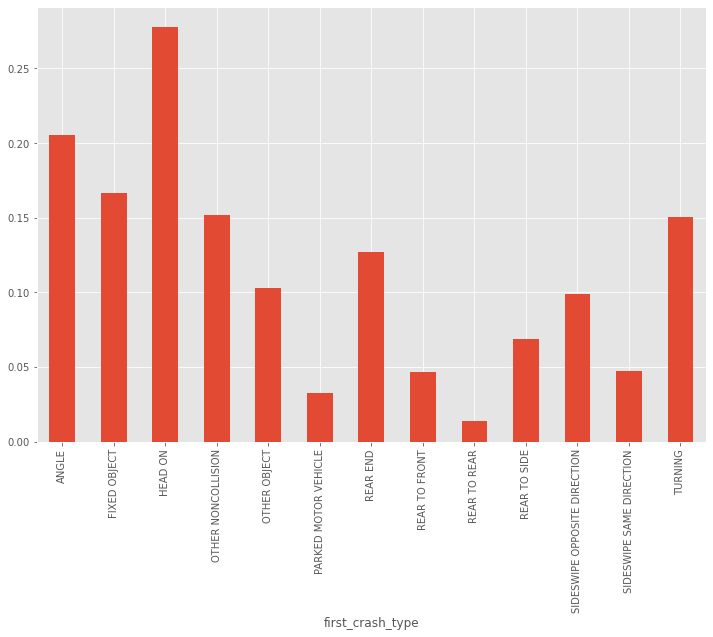

In [135]:
(inj_crash_type2 / crash_type2).plot(kind='bar', figsize=(12,8))

# Data by month/day


In [21]:
import calendar

In [22]:
accidents_by_month = df_injuries.groupby(df_injuries['crash_month']).count()

In [23]:
accidents_by_month.index = [calendar.month_name[x] for x in range(1,13)]

In [24]:
accidents_by_month = accidents_by_month['crash_hour']

In [160]:
accidents_by_month

January      5054
February     4456
March        4959
April        5010
May          6295
June         6702
July         7277
August       7483
September    6631
October      6366
November     5428
December     5364
Name: crash_hour, dtype: int64

In [26]:
all_accidents_by_month = df.groupby(df['crash_month']).count()
all_accidents_by_month.index = [calendar.month_name[x] for x in range(1,13)]


In [27]:
all_accidents_by_month = all_accidents_by_month['crash_hour']

In [28]:
all_accidents_by_month

January      41532
February     41420
March        41443
April        39620
May          46555
June         48371
July         50143
August       51811
September    46531
October      46520
November     42917
December     44270
Name: crash_hour, dtype: int64

In [29]:
prop_injury_by_month = accidents_by_month / all_accidents_by_month

In [30]:
prop_injury_by_month

January      0.121689
February     0.107581
March        0.119658
April        0.126451
May          0.135216
June         0.138554
July         0.145125
August       0.144429
September    0.142507
October      0.136844
November     0.126477
December     0.121166
Name: crash_hour, dtype: float64

Text(0, 0.5, '# of Accidents')

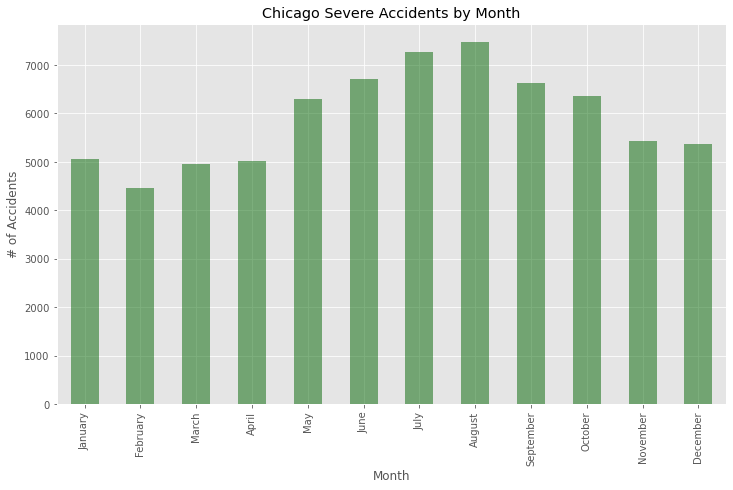

In [31]:
plt.style.use('ggplot')

accidents_by_month.plot(kind='bar', figsize=(12,7), color='darkgreen', alpha=.5)

plt.title("Chicago Severe Accidents by Month")
plt.xlabel('Month')
plt.ylabel('# of Accidents')

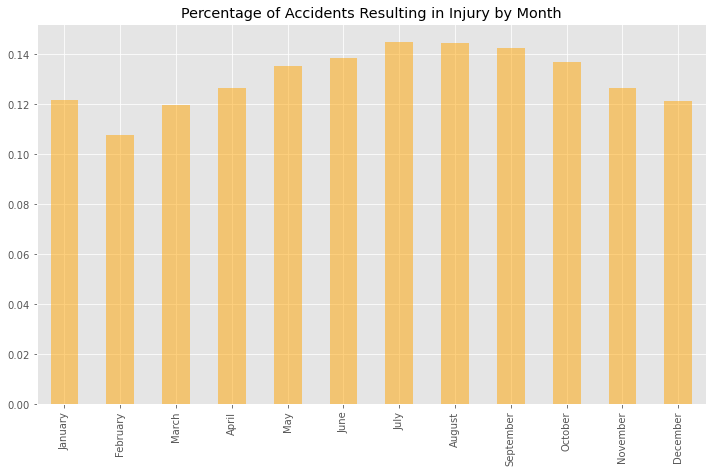

In [32]:
plt.style.use('ggplot')

prop_injury_by_month.plot(kind='bar', figsize=(12,7), color='orange', alpha=.5)

plt.title('Percentage of Accidents Resulting in Injury by Month');

In [33]:
accidents_by_hour = df_injuries.groupby(df_injuries['crash_hour']).count()

In [34]:
accidents_by_hour = accidents_by_hour['crash_date_x']

<AxesSubplot:xlabel='crash_hour'>

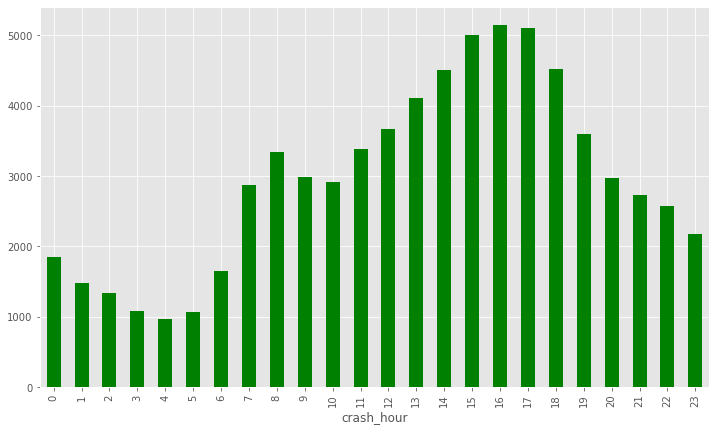

In [35]:
accidents_by_hour.plot(kind='bar', figsize=(12,7), color = 'green')

In [36]:
df_injuries['time_of_day'] = df_injuries['crash_hour'].map(lambda x: 'Morning' if (x >= 4 and  x < 12) else 'Afternoon' if (x >= 12 and x < 19) else 'Night')



<ipython-input-36-e512d3950d83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injuries['time_of_day'] = df_injuries['crash_hour'].map(lambda x: 'Morning' if (x >= 4 and  x < 12) else 'Afternoon' if (x >= 12 and x < 19) else 'Night')


In [37]:
df_injuries['time_of_day'].value_counts()

Afternoon    32047
Night        19797
Morning      19181
Name: time_of_day, dtype: int64

In [38]:
df_injuries['weather_condition'].value_counts()

CLEAR                     57085
RAIN                       7415
CLOUDY/OVERCAST            2418
SNOW                       2310
UNKNOWN                    1095
OTHER                       285
FOG/SMOKE/HAZE              142
SLEET/HAIL                  124
FREEZING RAIN/DRIZZLE       116
BLOWING SNOW                 22
SEVERE CROSS WIND GATE       13
Name: weather_condition, dtype: int64

In [39]:
df['weather_condition'].value_counts()

CLEAR                       430457
RAIN                         46498
UNKNOWN                      23856
SNOW                         20313
CLOUDY/OVERCAST              15882
OTHER                         1660
FOG/SMOKE/HAZE                 844
SLEET/HAIL                     722
FREEZING RAIN/DRIZZLE          628
BLOWING SNOW                   166
SEVERE CROSS WIND GATE         105
BLOWING SAND, SOIL, DIRT         2
Name: weather_condition, dtype: int64

In [42]:
df['crash_month'].value_counts()

8     51811
7     50143
6     48371
5     46555
9     46531
10    46520
12    44270
11    42917
1     41532
3     41443
2     41420
4     39620
Name: crash_month, dtype: int64

In [43]:
df['injury'].sum()

71025

In [44]:
df['injury'].sum() / len(df)

0.13125239081704498

In [46]:
df['weather_condition'].value_counts()

CLEAR                       430457
RAIN                         46498
UNKNOWN                      23856
SNOW                         20313
CLOUDY/OVERCAST              15882
OTHER                         1660
FOG/SMOKE/HAZE                 844
SLEET/HAIL                     722
FREEZING RAIN/DRIZZLE          628
BLOWING SNOW                   166
SEVERE CROSS WIND GATE         105
BLOWING SAND, SOIL, DIRT         2
Name: weather_condition, dtype: int64

In [47]:
df['weather_cat'] = df['weather_condition'].map(lambda x: 'Clear' if (x == 'CLEAR')
                                         else 'Rain' if (x == 'RAIN' or x == 'CLOUDY/OVERCAST' or x == 'FOG/SMOKE/HAZE')
                                         else 'Snowy' if (x == 'SNOW' or x == 'SLEET/HAIL' or x == 'BLOWING SNOW')
                                        else 'N/A')





<ipython-input-47-13cd23ecbf5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weather_cat'] = df['weather_condition'].map(lambda x: 'Clear' if (x == 'CLEAR')


# Road data exploration


In [49]:
count = df_injuries.groupby('street_name')['injury'].sum()

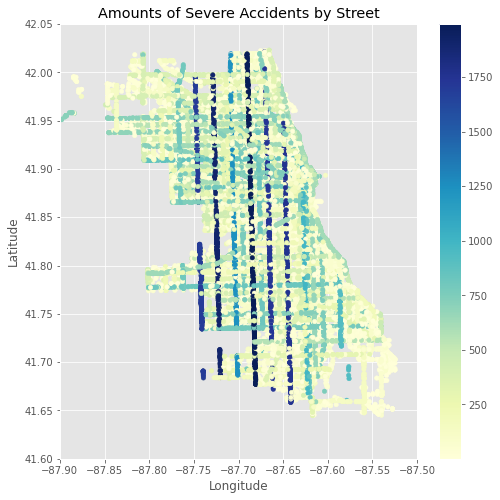

In [50]:
fig, ax = plt.subplots()

cmap = sns.cubehelix_palette(as_cmap =True)
hue = df_injuries['street_name'].apply(lambda x: count[x])
points = ax.scatter(df_injuries['longitude'], df_injuries['latitude'], c=hue, s=20,
                   cmap = 'YlGnBu')

ax.set_xlim((-87.9,-87.50))
ax.set_ylim((41.60,42.05))
fig.colorbar(points)
fig.set_size_inches(8,8)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Amounts of Severe Accidents by Street');


In [153]:
count.sort_values(ascending=False).head(15)

street_name
WESTERN AVE         1993
PULASKI RD          1908
HALSTED ST          1760
ASHLAND AVE         1736
CICERO AVE          1701
KEDZIE AVE          1239
STATE ST             995
STONY ISLAND AVE     932
MICHIGAN AVE         883
NORTH AVE            858
63RD ST              832
DAMEN AVE            824
MADISON ST           812
CENTRAL AVE          804
87TH ST              783
Name: injury, dtype: int64

In [51]:
injuries_by_street = df_injuries.groupby(df_injuries['street_name']).count()




In [52]:
danger_streets = injuries_by_street['crash_month'].sort_values(ascending=False).head(20)

In [53]:
danger_streets

street_name
WESTERN AVE          1993
PULASKI RD           1908
HALSTED ST           1760
ASHLAND AVE          1736
CICERO AVE           1701
KEDZIE AVE           1239
STATE ST              995
STONY ISLAND AVE      932
MICHIGAN AVE          883
NORTH AVE             858
63RD ST               832
DAMEN AVE             824
MADISON ST            812
CENTRAL AVE           804
87TH ST               783
CALIFORNIA AVE        764
COTTAGE GROVE AVE     760
CHICAGO AVE           755
ROOSEVELT RD          743
MILWAUKEE AVE         733
Name: crash_month, dtype: int64

In [54]:
western_ave_acc = df_injuries.loc[df_injuries['street_name'] == 'WESTERN AVE']

In [55]:
western_ave_causes = western_ave_acc['prim_contributory_cause'].value_counts()

In [56]:
western_ave_causes

UNABLE TO DETERMINE                                                                 560
FAILING TO YIELD RIGHT-OF-WAY                                                       333
FOLLOWING TOO CLOSELY                                                               249
FAILING TO REDUCE SPEED TO AVOID CRASH                                              161
DISREGARDING TRAFFIC SIGNALS                                                         90
IMPROPER TURNING/NO SIGNAL                                                           82
NOT APPLICABLE                                                                       71
IMPROPER LANE USAGE                                                                  63
IMPROPER OVERTAKING/PASSING                                                          52
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  45
PHYSICAL CONDITION OF DRIVER                                                         39
OPERATING VEHICLE IN ERRATIC, RE

In [58]:
western_ave_causes = western_ave_causes.drop(labels=['UNABLE TO DETERMINE', 'NOT APPLICABLE'])

<AxesSubplot:>

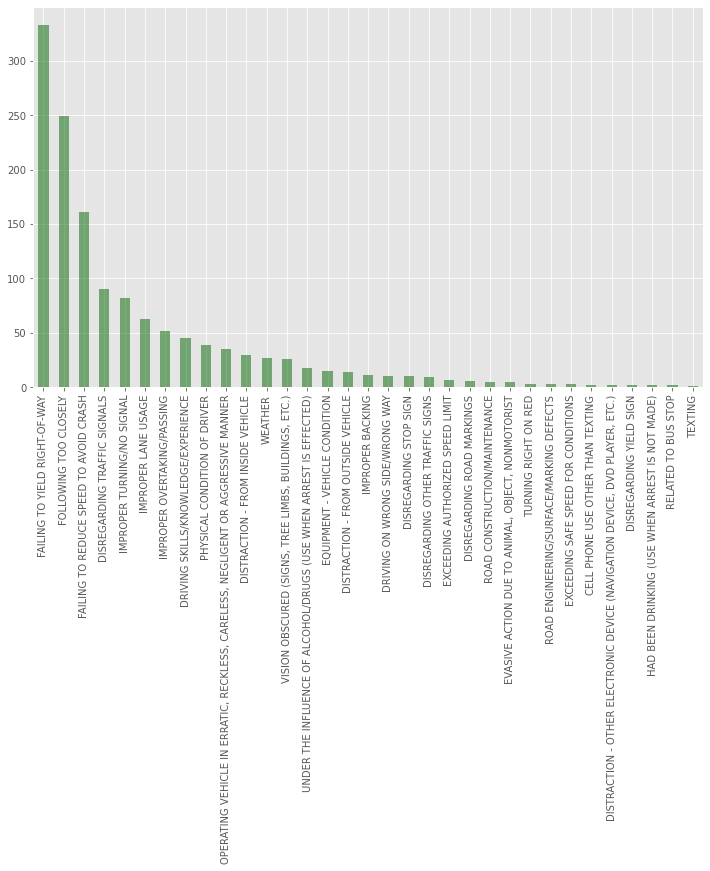

In [59]:
western_ave_causes.plot(kind='bar', figsize=(12,7), color='darkgreen', alpha=.5)

# Combining Prim Causes

In [55]:
df['prim_contributory_cause'].value_counts()

UNABLE TO DETERMINE                                                                 202535
FAILING TO YIELD RIGHT-OF-WAY                                                        59071
FOLLOWING TOO CLOSELY                                                                56183
NOT APPLICABLE                                                                       29030
IMPROPER OVERTAKING/PASSING                                                          25754
FAILING TO REDUCE SPEED TO AVOID CRASH                                               23418
IMPROPER BACKING                                                                     23249
IMPROPER LANE USAGE                                                                  20576
IMPROPER TURNING/NO SIGNAL                                                           17895
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  17175
DISREGARDING TRAFFIC SIGNALS                                                         10095

In [161]:
cause_dict = {'FAILING TO YIELD RIGHT-OF-WAY': 'Breaking Rules of Road',
              'IMPROPER LANE USAGE': 'Reckless/Poor Driving',
             'DISREGARDING TRAFFIC SIGNALS' : 'Breaking Rules of Road',
             'IMPROPER TURNING/NO SIGNAL': 'Reckless/Poor Driving',
              'DISREGARDING STOP SIGN' : 'Breaking Rules of Road',
             'DISREGARDING OTHER TRAFFIC SIGNS': 'Breaking Rules of Road',
             'DISREGARDING ROAD MARKINGS': 'Breaking Rules of Road',
             'DISREGARDING YIELD SIGN': 'Breaking Rules of Road',
             'PASSING STOPPED SCHOOL BUS': 'Breaking Rules of Road',
             'TURNING RIGHT ON RED': 'Breaking Rules of Road',
              'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Speed Related',
              'EXCEEDING AUTHORIZED SPEED LIMIT': 'Speed Related',
              'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Speed Related',
              'FOLLOWING TOO CLOSELY': 'Reckless/Poor Driving',
              'IMPROPER OVERTAKING/PASSING': 'Reckless/Poor Driving',
              'IMPROPER BACKING': 'Reckless/Poor Driving',
              'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Reckless/Poor Driving',
              'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Reckless/Poor Driving',
              'DRIVING ON WRONG SIDE/WRONG WAY': 'Reckless/Poor Driving',
              'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Drug/Alcohol Related',
              'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Drug/Alcohol Related',
              'PHYSICAL CONDITION OF DRIVER': 'Reckless/Poor Driving',
              'DISTRACTION - FROM INSIDE VEHICLE':'Distracted Driving',
              'CELL PHONE USE OTHER THAN TEXTING':'Distracted Driving',
              'TEXTING':'Distracted Driving',
              'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'Distracted Driving',
              'WEATHER':"Outside World/Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION':"Outside World/Out of Driver's Control",
              'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':"Outside World/Out of Driver's Control",
              'DISTRACTION - FROM OUTSIDE VEHICLE':"Outside World/Out of Driver's Control",
              'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':"Outside World/Out of Driver's Control",
              'ROAD CONSTRUCTION/MAINTENANCE':"Outside World/Out of Driver's Control",
              'ANIMAL':"Outside World/Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION': "Outside World/Out of Driver's Control",
              'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':"Outside World/Out of Driver's Control",
              'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':"Outside World/Out of Driver's Control",
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT':"Outside World/Out of Driver's Control",
              'UNABLE TO DETERMINE': 'Other/Unknown',
              'NOT APPLICABLE': 'Other/Unknown',
              'OBSTRUCTED CROSSWALKS': 'Other/Unknown',
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown',
              'RELATED TO BUS STOP': 'Other/Unknown',
             'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown'}

In [162]:
df1['Simple_Reason'] = df1['prim_contributory_cause'].map(cause_dict)

<ipython-input-162-935cda9ff85c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Simple_Reason'] = df1['prim_contributory_cause'].map(cause_dict)


In [163]:
df1['Simple_Reason'].value_counts()

Other/Unknown                            231895
Reckless/Poor Driving                    173690
Breaking Rules of Road                    77787
Speed Related                             27084
Outside World/Out of Driver's Control     21996
Distracted Driving                         5227
Drug/Alcohol Related                       3454
Name: Simple_Reason, dtype: int64

In [164]:
df1

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause,first_crash_type,Simple_Reason
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,41.860250,-87.695575,0,1,6,CALIFORNIA BLVD,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,4,NONE,NaN,UNABLE TO DETERMINE,OTHER NONCOLLISION,Other/Unknown
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,41.900043,-87.755577,0,9,3,LARAMIE AVE,"OVER $1,500",Y,WET,NO DEFECTS,RAIN,7,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,Other/Unknown
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,41.736044,-87.653404,0,4,22,87TH ST,$500 OR LESS,Y,DRY,NO DEFECTS,CLEAR,2,NONE,NaN,IMPROPER OVERTAKING/PASSING,SIDESWIPE SAME DIRECTION,Reckless/Poor Driving
6,80f5b6eff349a72094c9c7a11745549caa8bd39b57cedd...,09/09/2018 08:50:00 AM,41.999816,-87.663273,0,9,8,LAKEWOOD AVE,"$501 - $1,500",Y,DRY,NO DEFECTS,UNKNOWN,1,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,Other/Unknown
7,ecf9e646f89a73ed3df0f373e4fbd18e91f5a595004019...,02/03/2020 03:45:00 PM,41.997755,-87.694830,1,2,15,DEVON AVE,"OVER $1,500",NaN,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,NaN,DISREGARDING TRAFFIC SIGNALS,ANGLE,Breaking Rules of Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960892,068cbdb2cdeabf6e8aeb80a0d6232ccf3e58343fd86596...,08/27/2021 11:00:00 PM,41.925774,-87.775205,0,8,23,ALTGELD ST,"$501 - $1,500",NaN,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,SIDESWIPE OPPOSITE DIRECTION,Other/Unknown
1960896,0a9142cc8636fc80cac7037ad58a5ec25ef1653b421b2f...,08/27/2021 09:00:00 AM,41.871698,-87.627484,0,8,9,8TH ST,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,PARKED MOTOR VEHICLE,Other/Unknown
1960910,7bc56cd28d1f86dc1788787e71f54628404ff5b53c193e...,08/27/2021 03:45:00 PM,41.885782,-87.647022,0,8,15,LAKE ST,"OVER $1,500",Y,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,ANGLE,Other/Unknown
1960926,3469769654612e4e4d2f6685b25c85d1d7b27e83ba0ddd...,08/27/2021 08:39:00 AM,41.751965,-87.557019,0,8,8,79TH ST,$500 OR LESS,NaN,DRY,UNKNOWN,CLEAR,6,UNKNOWN,NaN,UNABLE TO DETERMINE,ANIMAL,Other/Unknown


In [63]:
df2 = pd.get_dummies(df1,columns=['Simple_Reason'])

In [65]:
df2 = df2.drop(labels = ['crash_record_id','crash_date_x','latitude','longitude', 'street_name',
                       'damage','exceed_speed_limit_i', 'prim_contributory_cause', 'hit_and_run_i'], axis=1)

In [66]:
df2

,injury,crash_month,crash_hour,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,Simple_Reason_Breaking Rules of Road,Simple_Reason_Distracted Driving,Simple_Reason_Drug/Alcohol Related,Simple_Reason_Other/Unknown,Simple_Reason_Outside World/Out of Driver's Control,Simple_Reason_Reckless/Poor Driving,Simple_Reason_Speed Related
0,0,1,6,DRY,NO DEFECTS,CLEAR,4,NONE,0,0,0,1,0,0,0
1,0,9,3,WET,NO DEFECTS,RAIN,7,UNKNOWN,0,0,0,1,0,0,0
4,0,4,22,DRY,NO DEFECTS,CLEAR,2,NONE,0,0,0,0,0,1,0
6,0,9,8,DRY,NO DEFECTS,UNKNOWN,1,UNKNOWN,0,0,0,1,0,0,0
7,1,2,15,DRY,NO DEFECTS,CLEAR,2,DISREGARDED CONTROL DEVICES,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960892,0,8,23,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,0,0,0,1,0,0,0
1960896,0,8,9,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,0,0,0,1,0,0,0
1960910,0,8,15,DRY,NO DEFECTS,CLEAR,6,UNKNOWN,0,0,0,1,0,0,0
1960926,0,8,8,DRY,UNKNOWN,CLEAR,6,UNKNOWN,0,0,0,1,0,0,0


In [103]:
X = df2
y = df2['injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

In [104]:
logreg =LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))     
print("Recall:", recall_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))
print("CVS", cross_val_score(logreg, X_train, y_train, scoring="neg_root_mean_squared_error").mean())

ValueError: could not convert string to float: 'DRY'

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [79]:
ohe = OneHotEncoder(drop='first', categories = 'Simple_Reason')


In [291]:
df_weather = df_injuries.loc[df_injuries['prim_contributory_cause'] == 'WEATHER']

In [295]:
df_weather

,crash_record_id,crash_date_x,latitude,longitude,injury,crash_month,fatalty,crash_hour,street_name,damage,hit_and_run_i,roadway_surface_cond,road_defect,weather_condition,crash_day_of_week,driver_action,exceed_speed_limit_i,prim_contributory_cause,time_of_day
3276,0b1ce91631d51773324a2b44320143f9ae12a1fdddbc9d...,02/13/2020 08:30:00 AM,41.997356,-87.802986,1,2,0,8,DEVON AVE,"OVER $1,500",NaN,SNOW OR SLUSH,NO DEFECTS,SNOW,5,OTHER,NaN,WEATHER,Morning
4992,12579080a1c57608ec074f2e3cadf204d8ddda4de3998d...,02/13/2020 08:20:00 AM,41.790942,-87.620897,1,2,0,8,INDIANA AVE,$500 OR LESS,NaN,SNOW OR SLUSH,NO DEFECTS,SNOW,5,UNKNOWN,NaN,WEATHER,Morning
6135,b525afe8405ef37c55184790c5c440917aa3970d8b749e...,07/10/2020 09:23:00 AM,41.722387,-87.584984,1,7,0,9,STONY ISLAND AVE,"OVER $1,500",NaN,WET,NO DEFECTS,RAIN,6,OTHER,NaN,WEATHER,Morning
6559,8c6120d37a26b3107fcb2c17fc7947db66b5ff94ca893f...,01/30/2020 08:50:00 AM,41.986797,-87.674754,1,1,0,8,RAVENSWOOD AVE,"OVER $1,500",NaN,ICE,NO DEFECTS,CLEAR,5,TOO FAST FOR CONDITIONS,NaN,WEATHER,Morning
8902,3949a39a68e3a2a31d6ec2d826dcac16777007fbcfb166...,01/31/2020 08:05:00 AM,41.859223,-87.627091,1,1,0,8,STATE ST,"OVER $1,500",NaN,WET,NO DEFECTS,SNOW,6,NONE,NaN,WEATHER,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953767,aded2978803323d55b56668cd550d798a7aae034fcef63...,08/24/2021 05:40:00 PM,42.018178,-87.665568,1,8,0,17,SHERIDAN RD,"OVER $1,500",NaN,WET,NO DEFECTS,RAIN,3,OTHER,NaN,WEATHER,Afternoon
1953944,1f32ffafb82bf43742562b8939c82e204dcfcae4bb15fb...,08/24/2021 08:35:00 PM,41.760437,-87.557212,1,8,0,20,SOUTH SHORE DR,"OVER $1,500",Y,WET,NO DEFECTS,RAIN,3,UNKNOWN,NaN,WEATHER,Night
1953965,d9226042cdf3572295fcd0dc1833a863fda6df8c5e79c4...,08/24/2021 05:48:00 PM,41.968417,-87.699498,1,8,0,17,LAWRENCE AVE,"OVER $1,500",NaN,WET,NO DEFECTS,RAIN,3,NONE,NaN,WEATHER,Afternoon
1954020,70b394b5e010958ba23002bc1dd4cce0e1a4ab701e2924...,08/24/2021 10:55:00 PM,41.919947,-87.785477,1,8,0,22,NARRAGANSETT AVE,"OVER $1,500",NaN,WET,NO DEFECTS,RAIN,3,TOO FAST FOR CONDITIONS,NaN,WEATHER,Night


In [296]:
df_weather['roadway_surface_cond'].value_counts()

WET              696
SNOW OR SLUSH    317
ICE              155
DRY               29
OTHER              1
Name: roadway_surface_cond, dtype: int64

In [298]:
df_injuries['roadway_surface_cond'].value_counts()

DRY                54366
WET                11423
UNKNOWN             2481
SNOW OR SLUSH       2031
ICE                  475
OTHER                214
SAND, MUD, DIRT       35
Name: roadway_surface_cond, dtype: int64

In [299]:
df['roadway_surface_cond'].value_counts()

DRY                407141
WET                 71642
UNKNOWN             36479
SNOW OR SLUSH       20427
ICE                  3928
OTHER                1285
SAND, MUD, DIRT       231
Name: roadway_surface_cond, dtype: int64

In [300]:
(df_injuries['roadway_surface_cond'].value_counts()) / (df['roadway_surface_cond'].value_counts())

DRY                0.133531
WET                0.159446
UNKNOWN            0.068012
SNOW OR SLUSH      0.099427
ICE                0.120927
OTHER              0.166537
SAND, MUD, DIRT    0.151515
Name: roadway_surface_cond, dtype: float64